<a href="https://colab.research.google.com/github/tealtourmaline/Mineria-y-calidad-de-datos/blob/main/MINERIA_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación: ResultadosSaber11
El objetivo de este modelo es predecir el resultado de nivel de inglés que van a obtener los estudiantes que presenten las pruebas saber 11.



In [19]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Se cargan los datos
data= pd.read_excel("ResultadosSaberLimpios.xlsx",index_col=None, sheet_name=0)
data = data.drop(columns=['Unnamed: 0'])
data.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CARACTER,COLE_JORNADA,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,DESEMP_INGLES
0,URBANO,N,TÉCNICO/ACADÉMICO,COMPLETA,Postgrado,Educación profesional completa,Estrato 4,Si,Si,Si,Si,437,B+
1,URBANO,N,TÉCNICO,MAÑANA,Postgrado,Secundaria (Bachillerato) completa,Estrato 3,Si,Si,Si,Si,355,A2
2,URBANO,S,ACADÉMICO,COMPLETA,Educación profesional incompleta,Educación profesional completa,Estrato 6,Si,Si,Si,Si,363,B+
3,RURAL,S,ACADÉMICO,MAÑANA,Educación profesional completa,Educación profesional completa,Estrato 6,Si,Si,Si,Si,350,B1
4,RURAL,S,ACADÉMICO,COMPLETA,Postgrado,Educación profesional completa,Estrato 6,Si,Si,Si,Si,378,B+


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21930 entries, 0 to 21929
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COLE_AREA_UBICACION   21930 non-null  object
 1   COLE_BILINGUE         21930 non-null  object
 2   COLE_CARACTER         21930 non-null  object
 3   COLE_JORNADA          21930 non-null  object
 4   FAMI_EDUCACIONMADRE   21930 non-null  object
 5   FAMI_EDUCACIONPADRE   21930 non-null  object
 6   FAMI_ESTRATOVIVIENDA  21930 non-null  object
 7   FAMI_TIENEAUTOMOVIL   21930 non-null  object
 8   FAMI_TIENECOMPUTADOR  21930 non-null  object
 9   FAMI_TIENEINTERNET    21930 non-null  object
 10  FAMI_TIENELAVADORA    21930 non-null  object
 11  PUNT_GLOBAL           21930 non-null  int64 
 12  DESEMP_INGLES         21930 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.2+ MB


In [22]:
#Corrección del tipo de datos object a categorías
data['COLE_AREA_UBICACION']=data['COLE_AREA_UBICACION'].astype('category')
data['COLE_BILINGUE']=data['COLE_BILINGUE'].astype('category')
data['COLE_CARACTER']=data['COLE_CARACTER'].astype('category')
data['COLE_JORNADA']=data['COLE_JORNADA'].astype('category')
data['FAMI_EDUCACIONMADRE']=data['FAMI_EDUCACIONMADRE'].astype('category')
data['FAMI_EDUCACIONPADRE']=data['FAMI_EDUCACIONPADRE'].astype('category')
data['FAMI_ESTRATOVIVIENDA']=data['FAMI_ESTRATOVIVIENDA'].astype('category')
data['FAMI_TIENEAUTOMOVIL']=data['FAMI_TIENEAUTOMOVIL'].astype('category')
data['FAMI_TIENECOMPUTADOR']=data['FAMI_TIENECOMPUTADOR'].astype('category')
data['FAMI_TIENEINTERNET']=data['FAMI_TIENEINTERNET'].astype('category')
data['FAMI_TIENELAVADORA']=data['FAMI_TIENELAVADORA'].astype('category')
data['DESEMP_INGLES']=data['DESEMP_INGLES'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21930 entries, 0 to 21929
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COLE_AREA_UBICACION   21930 non-null  category
 1   COLE_BILINGUE         21930 non-null  category
 2   COLE_CARACTER         21930 non-null  category
 3   COLE_JORNADA          21930 non-null  category
 4   FAMI_EDUCACIONMADRE   21930 non-null  category
 5   FAMI_EDUCACIONPADRE   21930 non-null  category
 6   FAMI_ESTRATOVIVIENDA  21930 non-null  category
 7   FAMI_TIENEAUTOMOVIL   21930 non-null  category
 8   FAMI_TIENECOMPUTADOR  21930 non-null  category
 9   FAMI_TIENEINTERNET    21930 non-null  category
 10  FAMI_TIENELAVADORA    21930 non-null  category
 11  PUNT_GLOBAL           21930 non-null  int64   
 12  DESEMP_INGLES         21930 non-null  category
dtypes: category(12), int64(1)
memory usage: 430.7 KB


In [23]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
data = pd.get_dummies(data, columns=['COLE_AREA_UBICACION'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['COLE_BILINGUE'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['COLE_CARACTER'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['COLE_JORNADA'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_EDUCACIONMADRE'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_EDUCACIONPADRE'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_ESTRATOVIVIENDA'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENEAUTOMOVIL'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENECOMPUTADOR'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENEINTERNET'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENELAVADORA'], drop_first=True, dtype=int)
data.head()

,PUNT_GLOBAL,DESEMP_INGLES,COLE_AREA_UBICACION_URBANO,COLE_BILINGUE_S,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,...,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si
0,437,B+,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,1,1,1
1,355,A2,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,1,1
2,363,B+,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
3,350,B1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
4,378,B+,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1


In [24]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["DESEMP_INGLES"]=labelencoder.fit_transform(data["DESEMP_INGLES"])

data.head()

,PUNT_GLOBAL,DESEMP_INGLES,COLE_AREA_UBICACION_URBANO,COLE_BILINGUE_S,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,...,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si
0,437,3,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,1,1,1
1,355,2,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,1,1
2,363,3,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
3,350,4,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
4,378,3,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1


# División 70-30

<Axes: xlabel='DESEMP_INGLES'>

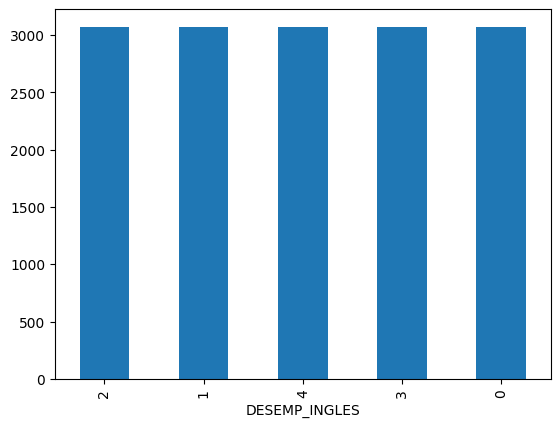

In [26]:
from sklearn.model_selection import train_test_split
X = data.drop("DESEMP_INGLES", axis = 1) # Variables predictoras
Y = data['DESEMP_INGLES'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='DESEMP_INGLES'>

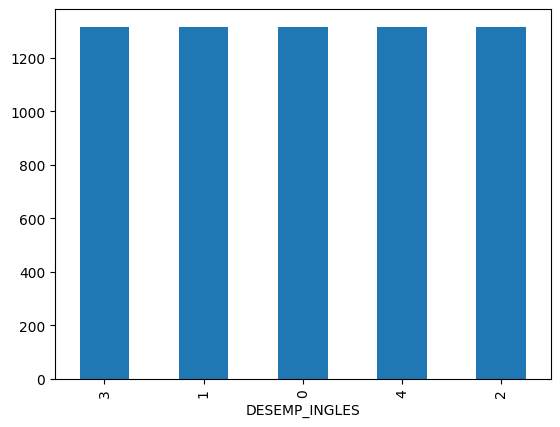

In [27]:
Y_test.value_counts().plot(kind='bar')

# Entrenamiento

In [ ]:
#Aprendizaje con el 70 y evaluación con el 30

#3. Hiperparametrización

In [ ]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])